In [ ]:
pip install dexplot

In [35]:
pip install stylecloud

In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
import string
import re
import dexplot as dxp
import stylecloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Preprocessing

In [37]:
tweets = pd.read_csv('/content/TweetsFeb15toMar1.csv', sep='~')

In [38]:
tweets.head()

Author_id  ...                                               Text
0   104099417  ...  #day11 #coronavirus #CoronavirusOutbreak #diam...
1   417382252  ...  Launch a Website Within Two days For 1M Users ...
2  1141308715  ...  Shame on you @KLM Hope you sack the racist cre...
3   540417929  ...  The #Coronavirus has had waves of unimaginable...
4    16638041  ...  @katestarbird has your team done any analysis ...

[5 rows x 13 columns]

In [39]:
tweets['Country_code'].value_counts().head()

US    8585
GB    1679
IN     805
NG     644
CA     489
Name: Country_code, dtype: int64

In [40]:
df  = pd.DataFrame(tweets['Text'])

In [41]:
def remove_mentions(text):
   text = re.sub("@[A-Za-z0-9_]+","", text)
   return text

In [42]:
df['Tweet_text@'] = df['Text'].apply(lambda x: remove_mentions(x))
df.head()

Text                                        Tweet_text@
0  #day11 #coronavirus #CoronavirusOutbreak #diam...  #day11 #coronavirus #CoronavirusOutbreak #diam...
1  Launch a Website Within Two days For 1M Users ...  Launch a Website Within Two days For 1M Users ...
2  Shame on you @KLM Hope you sack the racist cre...  Shame on you  Hope you sack the racist crew fo...
3  The #Coronavirus has had waves of unimaginable...  The #Coronavirus has had waves of unimaginable...
4  @katestarbird has your team done any analysis ...   has your team done any analysis of #covid19? ...

In [43]:
def remove_hashtags(text):
  #  text = "".join([char for char in text if char not in string.punctuation])
   text = re.sub(r'#(\w+)', '', text) 
   return text

In [44]:
df['Tweet_text#'] = df['Tweet_text@'].apply(lambda x: remove_hashtags(x))
df.head()

Text  ...                                        Tweet_text#
0  #day11 #coronavirus #CoronavirusOutbreak #diam...  ...      Japanese authority preparing testing kits ...
1  Launch a Website Within Two days For 1M Users ...  ...  Launch a Website Within Two days For 1M Users ...
2  Shame on you @KLM Hope you sack the racist cre...  ...  Shame on you  Hope you sack the racist crew fo...
3  The #Coronavirus has had waves of unimaginable...  ...  The  has had waves of unimaginable impact thro...
4  @katestarbird has your team done any analysis ...  ...   has your team done any analysis of ? Sentimen...

[5 rows x 3 columns]

In [45]:
def remove_URL(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'http\S+', '', text)
    return text

In [46]:
df['Tweet_text1'] = df['Tweet_text#'].apply(lambda x: remove_URL(x))
df.head()

Text  ...                                        Tweet_text1
0  #day11 #coronavirus #CoronavirusOutbreak #diam...  ...      Japanese authority preparing testing kits ...
1  Launch a Website Within Two days For 1M Users ...  ...  Launch a Website Within Two days For 1M Users ...
2  Shame on you @KLM Hope you sack the racist cre...  ...  Shame on you  Hope you sack the racist crew fo...
3  The #Coronavirus has had waves of unimaginable...  ...  The  has had waves of unimaginable impact thro...
4  @katestarbird has your team done any analysis ...  ...   has your team done any analysis of  Sentiment...

[5 rows x 4 columns]

In [47]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Tweet_text1'].apply(lambda x: remove_punct(x))
df.head(10)

Text  ...                                        Tweet_punct
0  #day11 #coronavirus #CoronavirusOutbreak #diam...  ...      Japanese authority preparing testing kits ...
1  Launch a Website Within Two days For 1M Users ...  ...  Launch a Website Within Two days For M Users W...
2  Shame on you @KLM Hope you sack the racist cre...  ...  Shame on you  Hope you sack the racist crew fo...
3  The #Coronavirus has had waves of unimaginable...  ...  The  has had waves of unimaginable impact thro...
4  @katestarbird has your team done any analysis ...  ...   has your team done any analysis of  Sentiment...
5  #corona virus go down, good day @ https://t.co...  ...                          virus go down good day   
6  Asked my Shanghai buddy if it was his mom that...  ...  Asked my Shanghai buddy if it was his mom that...
7  The #Egyptian #Health #Ministry has confirmed ...  ...  The    has confirmed its first case of the dea...
8  More staff than passenger #coronavirus #pekfly...  ...                      More staff than passenger    
9  @WHO should seek official position of all #Nat...  ...   should seek official position of all  members...

[10 rows x 5 columns]

In [48]:
df['Tweet_punct'][0]

'    Japanese authority preparing testing kits for taking samples from passengers on Baja deckthere is few group of them so I hope it’s only random test but not suspected  passengers  '

In [49]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

Text  ...                                    Tweet_tokenized
0  #day11 #coronavirus #CoronavirusOutbreak #diam...  ...  [, japanese, authority, preparing, testing, ki...
1  Launch a Website Within Two days For 1M Users ...  ...  [launch, a, website, within, two, days, for, m...
2  Shame on you @KLM Hope you sack the racist cre...  ...  [shame, on, you, hope, you, sack, the, racist,...
3  The #Coronavirus has had waves of unimaginable...  ...  [the, has, had, waves, of, unimaginable, impac...
4  @katestarbird has your team done any analysis ...  ...  [, has, your, team, done, any, analysis, of, s...

[5 rows x 6 columns]

In [50]:
stopwords_other = ['one', 'coronavirus', 'corona', '&amp;','amp', 'de', 'en', 'caption', 'also', 'copyright', 'something']
stopword = nltk.corpus.stopwords.words('english') + stopwords_other
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

Text  ...                                      Tweet_nonstop
0  #day11 #coronavirus #CoronavirusOutbreak #diam...  ...  [, japanese, authority, preparing, testing, ki...
1  Launch a Website Within Two days For 1M Users ...  ...  [launch, website, within, two, days, users, ze...
2  Shame on you @KLM Hope you sack the racist cre...  ...  [shame, hope, sack, racist, crew, insult, kore...
3  The #Coronavirus has had waves of unimaginable...  ...  [waves, unimaginable, impact, throughout, worl...
4  @katestarbird has your team done any analysis ...  ...  [, team, done, analysis, sentiment, analytics,...
5  #corona virus go down, good day @ https://t.co...  ...                         [, virus, go, good, day, ]
6  Asked my Shanghai buddy if it was his mom that...  ...  [asked, shanghai, buddy, mom, brought, another...
7  The #Egyptian #Health #Ministry has confirmed ...  ...  [confirmed, first, case, deadly, making, first...
8  More staff than passenger #coronavirus #pekfly...  ...                               [staff, passenger, ]
9  @WHO should seek official position of all #Nat...  ...  [, seek, official, position, members, contain,...

[10 rows x 7 columns]

In [51]:
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

def duplicated_values_data(data):
    dup=[]
    columns=data.columns
    for i in data.columns:
        dup.append(sum(data[i].duplicated()))
    return pd.concat([pd.Series(columns),pd.Series(dup)],axis=1,keys=['Columns','Duplicate count'])

def unique_values_in_column(data,feature):
    unique_val=pd.Series(data.loc[:,feature].unique())
    return pd.concat([unique_val],axis=1,keys=['Unique Values'])

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

def ngrams_top(corpus,ngram_range,n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df

In [52]:
duplicated_values_data(tweets)

Columns  Duplicate count
0            Author_id             8053
1            Creations              256
2               TwitID                0
3                 Like            18098
4                Reply            18291
5                Quote            18311
6              Retweet            18191
7                  Geo            14265
8   Full_Location_name            14287
9              Country            18305
10        Country_code            18210
11            Hashtags             9030
12                Text               93

In [53]:
count_values_in_column(tweets,'Country_code')

Total  Percentage
US   8585       46.74
GB   1679        9.14
IN    805        4.38
NG    644        3.51
CA    489        2.66
..    ...         ...
KP      1        0.01
BZ      1        0.01
MP      1        0.01
SZ      1        0.01
GY      1        0.01

[157 rows x 2 columns]

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


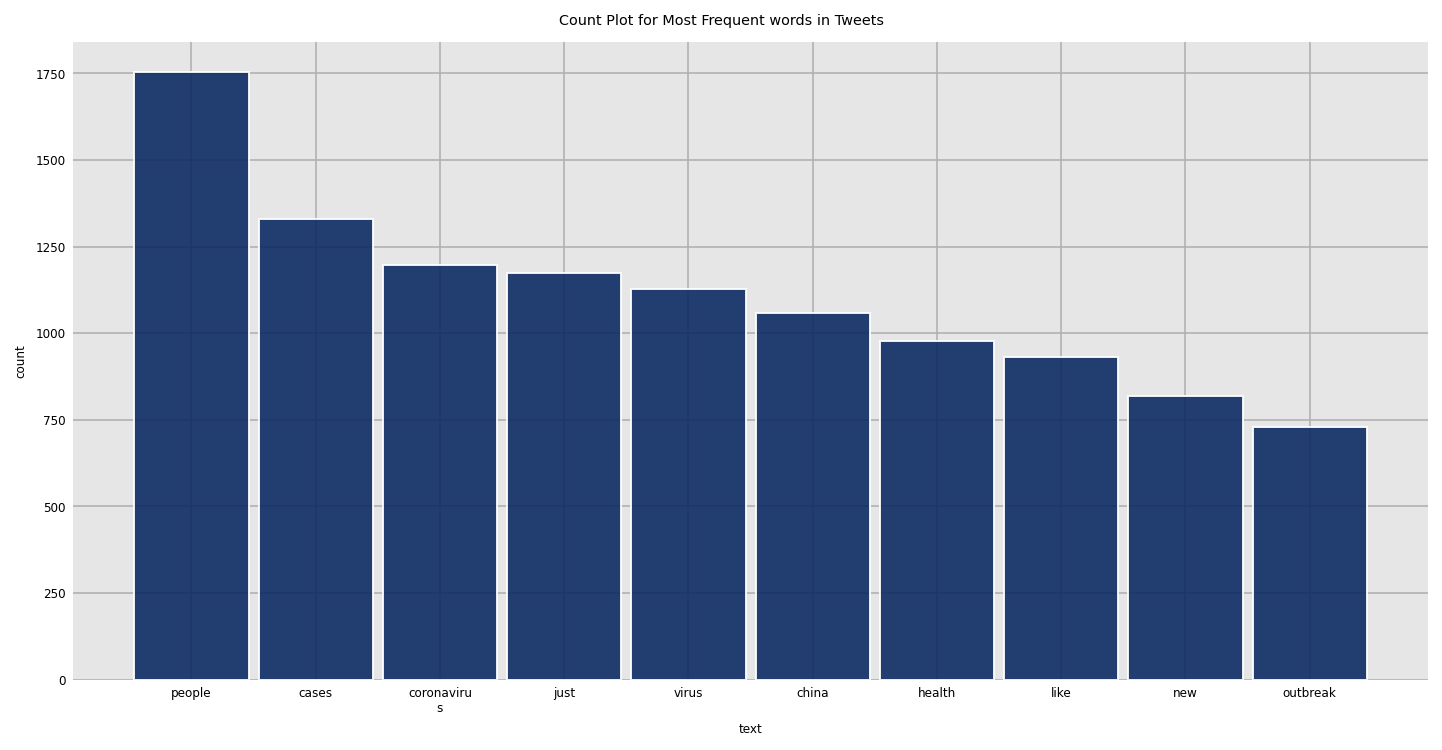

In [54]:
dd_11 = ngrams_top(df['Tweet_punct'],(1,1),n=10)
dxp.bar(x='text', y='count', data=dd_11,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

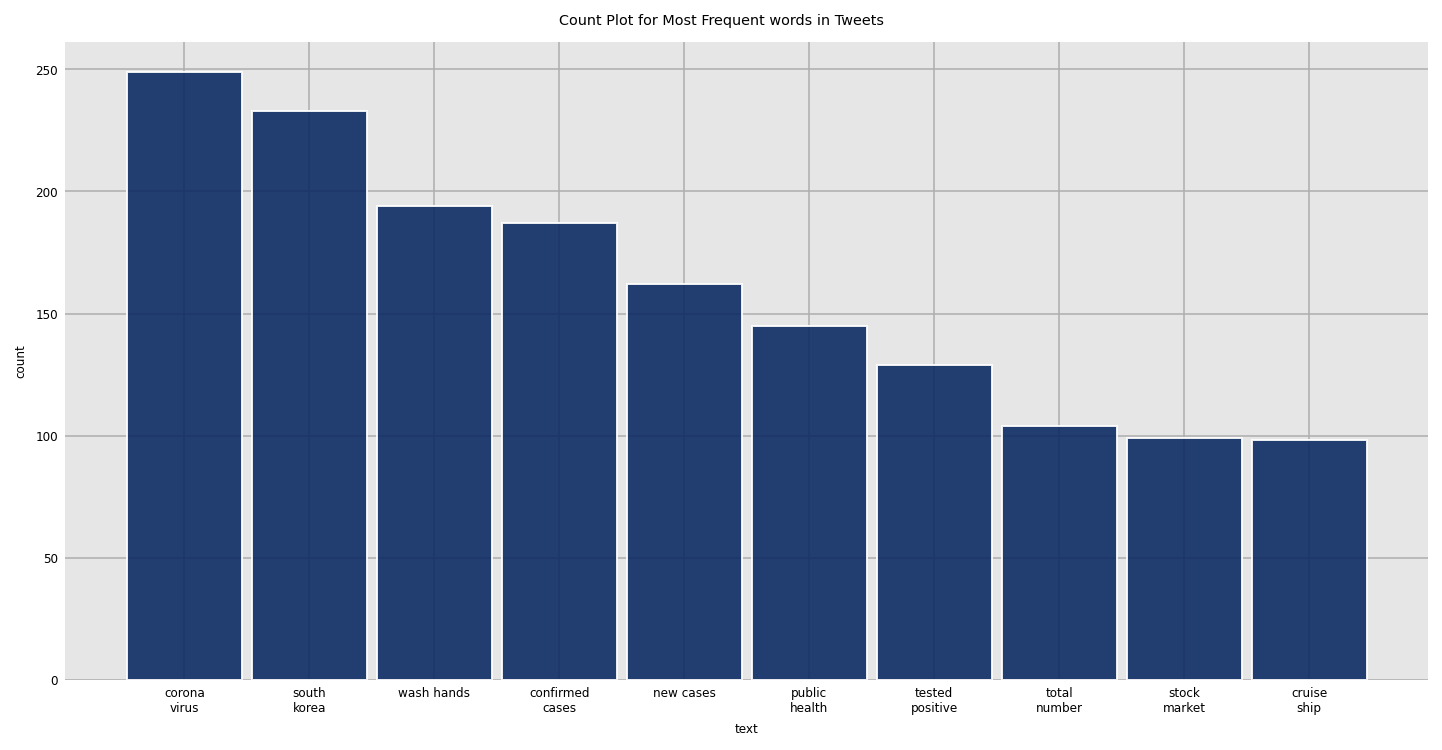

In [55]:
dd_22 = ngrams_top(df['Tweet_punct'],(2,2),n=10)
dxp.bar(x='text', y='count', data=dd_22,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

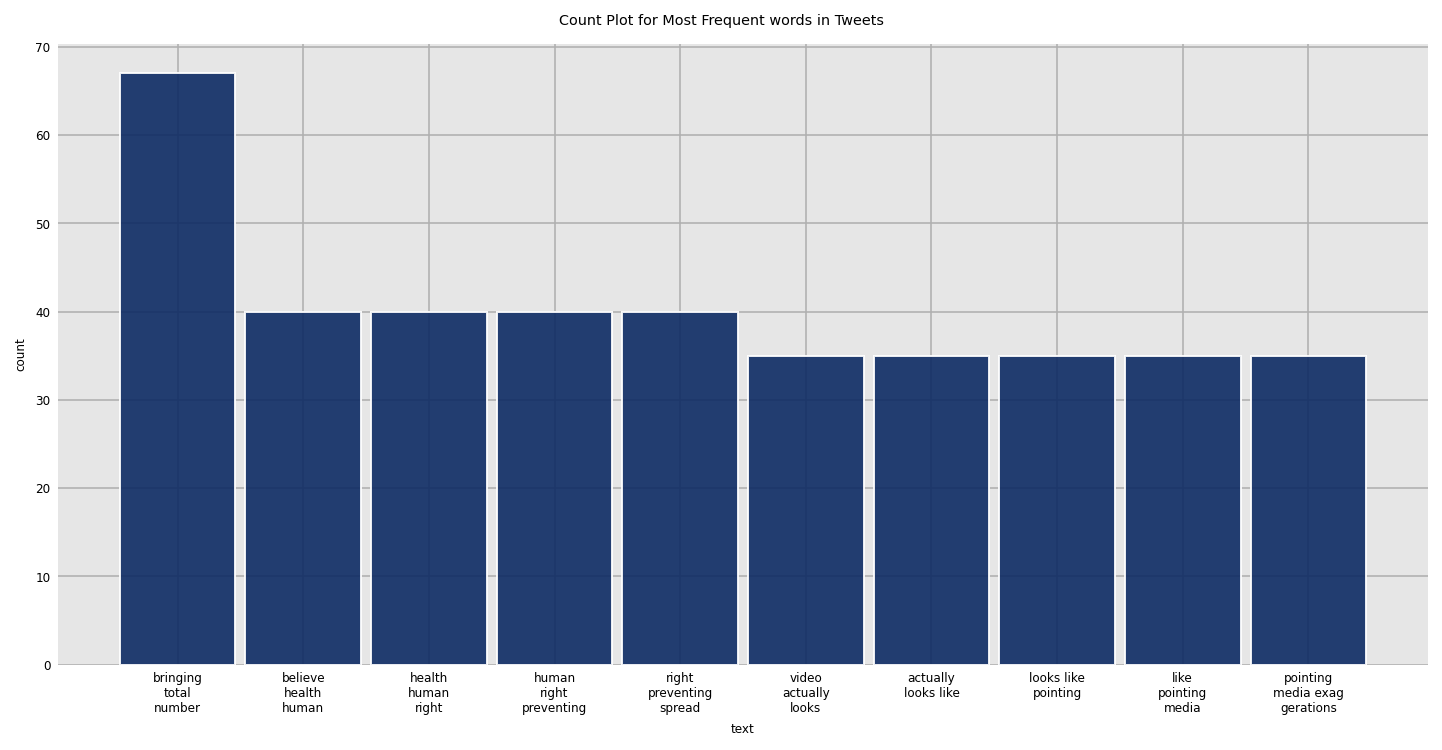

In [56]:
dd_33 = ngrams_top(df['Tweet_punct'],(3,3),n=10)
dxp.bar(x='text', y='count', data=dd_33,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

In [57]:
hashtags = df['Tweet_punct'].dropna().tolist()
unique_hashtags=(" ").join(hashtags)
stylecloud.gen_stylecloud(text = unique_hashtags,
                          icon_name='fas fa-first-aid',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal')

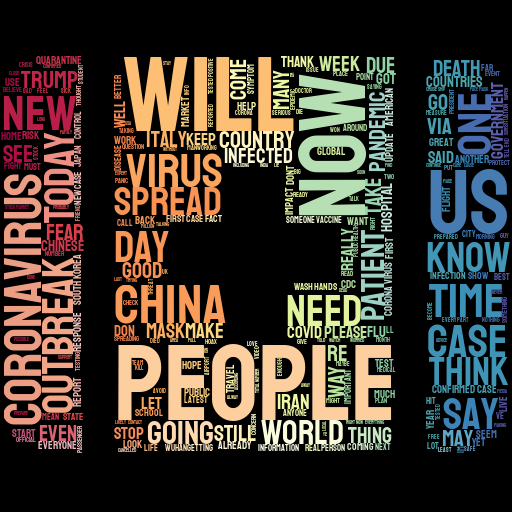

In [58]:
from IPython.display import Image 

Image("./stylecloud.png",width = 600, height = 600)


In [59]:
tweets['Tweet_text']=df['Tweet_nonstop']

In [60]:
tweets.head()

Author_id  ...                                         Tweet_text
0   104099417  ...  [, japanese, authority, preparing, testing, ki...
1   417382252  ...  [launch, website, within, two, days, users, ze...
2  1141308715  ...  [shame, hope, sack, racist, crew, insult, kore...
3   540417929  ...  [waves, unimaginable, impact, throughout, worl...
4    16638041  ...  [, team, done, analysis, sentiment, analytics,...

[5 rows x 14 columns]

#Model

In [ ]:
pip install pycaret

In [62]:
from pycaret.nlp import *

In [63]:
nlp1 = setup(tweets, target = 'Tweet_text', session_id=42, experiment_name='covid')

In [64]:
models()

Name                  Reference
ID                                                               
lda        Latent Dirichlet Allocation     gensim/models/ldamodel
lsi           Latent Semantic Indexing     gensim/models/lsimodel
hdp     Hierarchical Dirichlet Process     gensim/models/hdpmodel
rp                  Random Projections      gensim/models/rpmodel
nmf  Non-Negative Matrix Factorization  sklearn.decomposition.NMF

In [65]:
#Latent Dirichlet Allocation
lda = create_model('lda',multi_core=True, num_topics = 5)

In [77]:
lda_results = assign_model(lda)
lda_results.head()

Author_id                 Creations  ...  Dominant_Topic  Perc_Dominant_Topic
0   104099417  2020-02-15T00:58:14.000Z  ...         Topic 3                 0.53
1   417382252  2020-02-15T00:56:29.000Z  ...         Topic 4                 0.86
2  1141308715  2020-02-15T00:46:51.000Z  ...         Topic 3                 0.40
3   540417929  2020-02-15T00:42:30.000Z  ...         Topic 4                 0.86
4    16638041  2020-02-15T00:38:16.000Z  ...         Topic 4                 0.92

[5 rows x 21 columns]

In [78]:
lda_results.to_csv(r'./lda_results_march.csv', index = False, header=True)

In [79]:
save_model(lda, 'lda_saved')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x7fa77b9a32d0>, 'lda_saved.pkl')

In [80]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [81]:
plot_model(lda)

In [82]:
plot_model(lda, plot = 'distribution')

In [83]:
plot_model(lda, plot = 'bigram')

In [84]:
plot_model(lda, plot = 'trigram')


In [85]:
plot_model(lda, plot = 'topic_distribution')

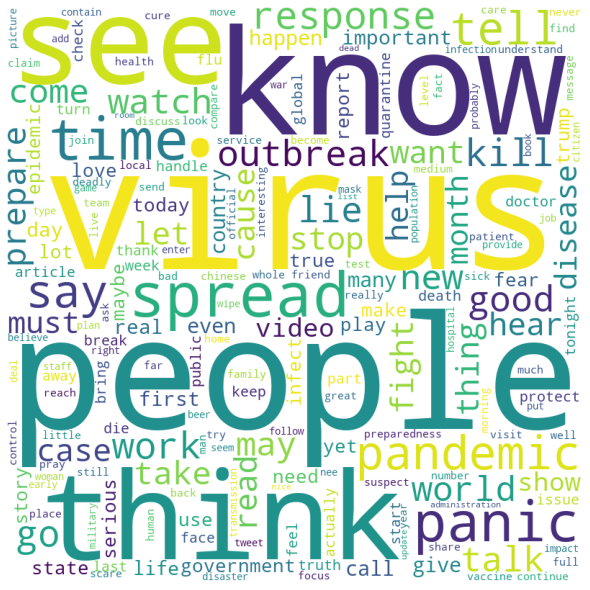

In [75]:
plot_model(lda, plot = 'wordcloud')

In [ ]:
evaluate_model(lda)

# Regression Model

In [1]:
# imports 
import math
import numpy as np 
import pandas as pd 
import plotly.express as ex
import plotly.graph_objects as go
import plotly.offline as pyo
from datetime import datetime
pyo.init_notebook_mode()

In [2]:
# load data
lda_tweets=pd.read_csv("./lda_results_march.csv")

In [87]:
# load data
Medical_df=pd.read_csv("./owid-covid-data.csv")

In [88]:
# Implement the above
Medical_df.location = Medical_df.location.replace().replace({
    "Czechia": "Czech Republic", 
    "United States": "USA", 
    "United Kingdom": "UK", 
    "Isle of Man": "Isle Of Man",
    "Republic of Ireland": "Ireland",
    "Northern Cyprus" : "Cyprus",
    "People's Republic of China" : "China"
})

# drop these 3 since they are included in UK 
Medical_df = Medical_df[Medical_df.location.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [5]:
lda_tweets['Creations']=[x[0:10] for x in lda_tweets['Creations']]

In [6]:
# eleminate the data under the 0.6 Perc_Dominant_Topic

lda_tweets=lda_tweets.loc[lda_tweets['Perc_Dominant_Topic']>0.6]
lda_tweets.head()

Author_id   Creations  ...  Dominant_Topic  Perc_Dominant_Topic
4  824157980740489222  2020-03-01  ...         Topic 0                 0.67
5            57139840  2020-03-01  ...         Topic 3                 0.65
6           342408271  2020-03-01  ...         Topic 4                 0.78
7          1554722300  2020-03-01  ...         Topic 4                 0.91
9            17090188  2020-03-01  ...         Topic 3                 0.84

[5 rows x 21 columns]

In [7]:
lda_topic0=lda_tweets.loc[lda_tweets['Dominant_Topic']=='Topic 0']
lda_topic0.head(2)

Author_id   Creations  ...  Dominant_Topic  Perc_Dominant_Topic
4   824157980740489222  2020-03-01  ...         Topic 0                 0.67
10           580274432  2020-03-01  ...         Topic 0                 0.72

[2 rows x 21 columns]

In [86]:
colmns=['Creations','Dominant_Topic','Country' ]
lda_topic0=lda_topic0[colmns]

In [9]:
lda_topic0.head()

Creations Dominant_Topic        Country
4   2020-03-01        Topic 0  United States
10  2020-03-01        Topic 0          India
26  2020-03-01        Topic 0          Japan
34  2020-03-01        Topic 0         Canada
38  2020-03-01        Topic 0  United States

In [10]:
grouped_multiple = lda_topic0.groupby(['Creations','Country']).agg({'Dominant_Topic': ['count']})
grouped_multiple.columns = ['Topic 0']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple.head()

Creations             Country  Topic 0
0  2020-03-01           Australia        3
1  2020-03-01              Canada       14
2  2020-03-01  Dominican Republic        1
3  2020-03-01             Germany        1
4  2020-03-01               India        3

In [89]:
Medical_df=Medical_df[['location','date','new_cases_smoothed_per_million','new_cases_per_million']]

In [15]:
Medical_df[['new_cases_smoothed_per_million']]=Medical_df[['new_cases_smoothed_per_million']].apply(lambda x: x.fillna(value=Medical_df['new_cases_per_million']))

In [16]:
Medical_df.rename(index=str, columns={'location': 'Country','date': 'Date'}, inplace=True)
grouped_multiple.rename(index=str, columns={'Creations': 'Date','Topic 0':'Tweet_cases'}, inplace=True)

In [17]:
df3 = pd.merge(grouped_multiple, Medical_df, how='outer', on=['Date', 'Country'])

In [18]:
df3=df3[['Date','Country','Tweet_cases','new_cases_smoothed_per_million']].fillna(0.0)

In [19]:
df3=df3.drop(['Date'],axis=1)
df3.head()

Country  Tweet_cases  new_cases_smoothed_per_million
0           Australia          3.0                           0.067
1              Canada         14.0                           0.057
2  Dominican Republic          1.0                           0.092
3             Germany          1.0                           0.194
4               India          3.0                           0.000

In [20]:
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [21]:
le = preprocessing.LabelEncoder()
df3['Country']=le.fit_transform(df3['Country'])
df3.head()

Country  Tweet_cases  new_cases_smoothed_per_million
0       13          3.0                           0.067
1       37         14.0                           0.057
2       58          1.0                           0.092
3       78          1.0                           0.194
4       95          3.0                           0.000

In [22]:
X = df3.drop(['new_cases_smoothed_per_million'], axis=1)
y = df3.pop('new_cases_smoothed_per_million')

In [23]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X.head()

Country  Tweet_cases
0 -1.497172     0.995113
1 -1.149782     4.769887
2 -0.845817     0.308790
3 -0.556326     0.308790
4 -0.310259     0.995113

In [24]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 :heart:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 72436
X_test size: 18109 



In [25]:
pip install lightgbm

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score

In [27]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [28]:
# Fitting XGB regressor model and default base learner is Decision Tree
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lightgbm.fit(X_train, y_train)

# Making Predictions
predictions = lightgbm.predict(X_test)

# Variance_score
print((explained_variance_score(predictions, y_test)))

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

-7.447113300004288
lightgbm: 136.0513 (4.9617)
 2021-05-24 20:11:31.833750
lightgbm


In [29]:
print('RMSLE score on test data:', rmsle(y_test, lgb_model_full_data.predict(X_test)))


# r2_score
print("R2SE: %f" % (np.sqrt(r2_score(y_test, predictions))))

RMSLE score on test data: 134.96789082948328
R2SE: 0.435877
